IMPORTATION DES LIBRAIRIES

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

IMPORT DES FICHIERS CSV

In [3]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv').fillna(0)
#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv').fillna(0)
#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv').fillna(0)
#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv').fillna(0)

DATAFRAMES :

In [4]:
print('population.csv :')
population.head()

population.csv :


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
# sous_nutrition.csv analyse du dataframe
print('sous_nutrition.csv :')
sous_nutrition.head()

sous_nutrition.csv :


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [6]:
# dispo_alimentaire.csv analyse du dataframe
print('dispo_alimentaire.csv :')
dispo_alimentaire.head()

dispo_alimentaire.csv :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [25]:
print(dispo_alimentaire['Traitement'].sum())

2204687.0


In [27]:
print(dispo_alimentaire['Disponibilité intérieure'].sum())

9848994.0


1) Proportion de personnes en état de sous-nutrition en 2017

In [7]:
# Population en 2017
sum_population = population['Valeur'].loc[population['Année'] == 2017].sum()
sum_population = sum_population / 1000
print(sum_population)

7548.134111


In [8]:
# Compte le nombre de personne en sous nutrition et le nombre de valeur en dessous de <0.1 pour comptabiliser les petites valeurs
sum_sous_nutrition = 0
nb_low_value = 0
for index, row in sous_nutrition.iterrows():
    if row['Année'] == '2016-2018' and row['Valeur'] != '<0.1':
        sum_sous_nutrition += float(row['Valeur'])
    elif row['Valeur'] == '<0.1':
        nb_low_value += 1

In [9]:
print('Pourcentage de la population en sous nutrition en 2017 : entre ', round(sum_sous_nutrition/sum_population*100,2), '% et', round((sum_sous_nutrition + nb_low_value * 0.1)/sum_population*100, 2),'%')

Pourcentage de la population en sous nutrition en 2017 : entre  7.1 % et 7.26 %


2) Nombre théorique de personnes qui pourraient être nourries en 2017

In [10]:
calorie_par_jour = 2500
df_calorie = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
df_population_2017 = population.loc[population['Année'] == 2017]
df_calorie_population_2017 = pd.merge(df_calorie, df_population_2017, how = "inner", on="Zone")
df_calorie_population_2017['Total Calories'] = df_calorie_population_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * (df_calorie_population_2017['Valeur']*1000)

nombre_nourries = int(df_calorie_population_2017['Total Calories'].sum()/calorie_par_jour)

print("Nombre théorique de personnes qui pourraient être nourries en 2017 :", nombre_nourries, "personnes. Equivalent à", round(nombre_nourries/(sum_population*1000000)*100, 2),'% de la population')

Nombre théorique de personnes qui pourraient être nourries en 2017 : 8367593850 personnes. Equivalent à 110.86 % de la population


3) Nombre théorique de personnes qui pourraient être nourries uniquement avec les végétaux en 2017

In [11]:
df_vegetaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']
df_calorie = df_vegetaux.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
df_calorie_population_2017 = pd.merge(df_calorie, df_population_2017, how = "inner", on="Zone")
df_calorie_population_2017['Total Calories'] = df_calorie_population_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * (df_calorie_population_2017['Valeur']*1000)

nombre_nourries = int(df_calorie_population_2017['Total Calories'].sum()/calorie_par_jour)

print("Nombre théorique de personnes qui pourraient être nourries avec des végétaux en 2017 :", nombre_nourries, "personnes. Equivalent à", round(nombre_nourries/(sum_population*1000000)*100, 2),'% de la population')

Nombre théorique de personnes qui pourraient être nourries avec des végétaux en 2017 : 6904305684 personnes. Equivalent à 91.47 % de la population


4) Répartition de la disponibilité intérieure

In [43]:
df_dispo = dispo_alimentaire[['Nourriture','Pertes','Aliments pour animaux','Autres Utilisations', 'Semences', 'Traitement']].sum()
total_dispo = dispo_alimentaire['Disponibilité intérieure'].sum()
df_dispo['Nourriture'] = df_dispo['Nourriture']/total_dispo*100
df_dispo['Pertes'] = df_dispo['Pertes']/total_dispo*100
df_dispo['Aliments pour animaux'] = df_dispo['Aliments pour animaux']/total_dispo*100
df_dispo['Autres Utilisations'] = df_dispo['Autres Utilisations']/total_dispo*100
df_dispo['Semences'] = df_dispo['Semences']/total_dispo*100
df_dispo['Traitement'] = df_dispo['Traitement']/total_dispo*100

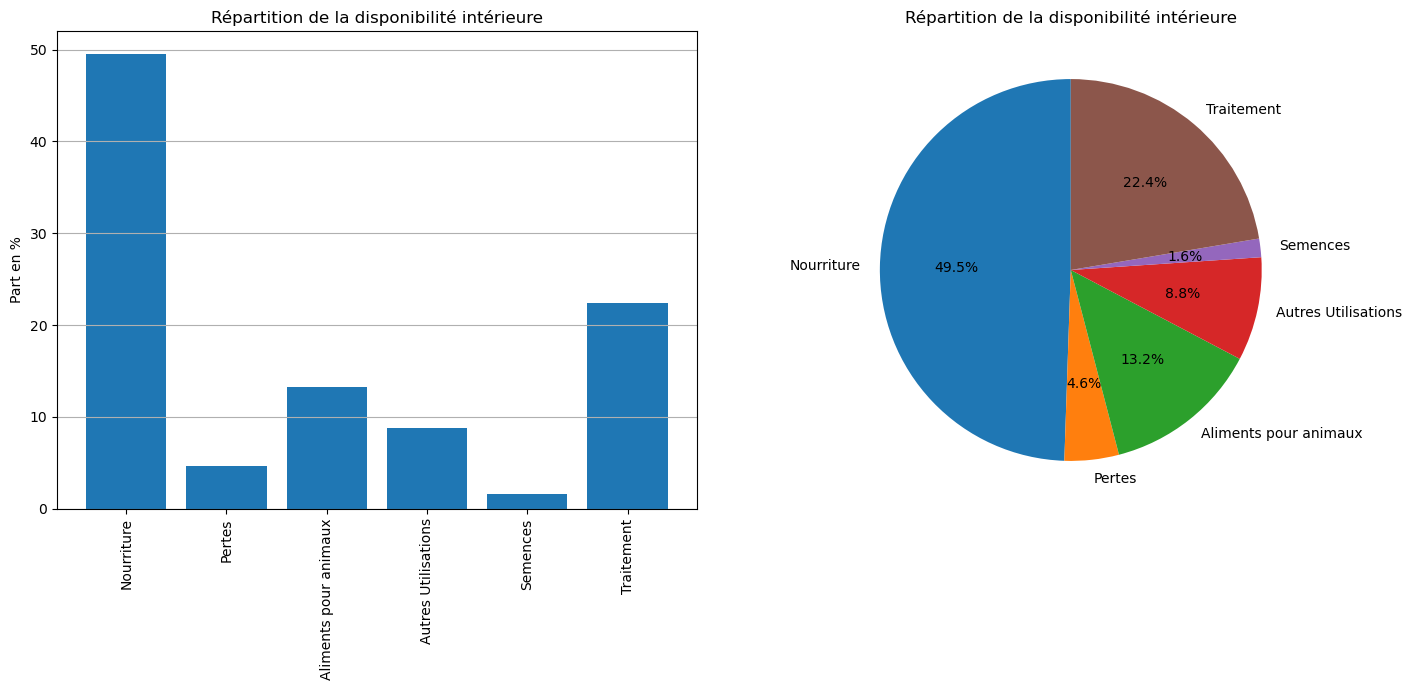

In [44]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.bar(df_dispo.index, df_dispo)
plt.xticks(df_dispo.index, df_dispo.index)
plt.xticks(rotation=90)
plt.grid(axis = "y")
plt.ylabel('Part en %')
plt.title('Répartition de la disponibilité intérieure')

plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième graphique
plt.pie(df_dispo, labels=df_dispo.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition de la disponibilité intérieure')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
# Afficher le graphique
plt.show()

5) Part de l’utilisation des principales céréales entre l’alimentation humaine et animale

In [14]:
df_cereale = dispo_alimentaire.groupby('Produit')[['Disponibilité intérieure', 'Nourriture', 'Aliments pour animaux']].sum()
#print(df_cereale.index.tolist())
df_cereale = df_cereale.loc[['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Avoine', 'Céréales, Autres', 'Millet', 'Seigle']]
print("Proportion totale des principales céréales pour l'alimentation d'animaux est de :",round(df_cereale['Aliments pour animaux'].sum()/df_cereale['Disponibilité intérieure'].sum()*100, 2),'%')
print("Proportion totale des principales céréales pour l'alimentation humaine est de :",round(df_cereale['Nourriture'].sum()/df_cereale['Disponibilité intérieure'].sum()*100, 2),'%')
df_cereale['Autres'] = df_cereale['Disponibilité intérieure'] - (df_cereale['Nourriture'] + df_cereale['Aliments pour animaux'])
df_cereale = df_cereale.drop('Disponibilité intérieure', axis=1)
df_normalized = df_cereale.div(df_cereale.sum(axis=1), axis=0) * 100
df_normalized.head(10)

Proportion totale des principales céréales pour l'alimentation d'animaux est de : 36.14 %
Proportion totale des principales céréales pour l'alimentation humaine est de : 42.78 %


,Nourriture,Aliments pour animaux,Autres
Produit,,,
Blé,67.376799,19.082911,13.540290
Riz (Eq Blanchi),79.319088,7.062667,13.618245
Orge,4.837688,65.977399,29.184913
Maïs,13.097314,57.137118,29.765568
Avoine,16.674499,69.427949,13.897552
"Céréales, Autres",19.370566,69.255958,11.373476
Millet,77.028518,11.052790,11.918692
Seigle,33.210599,48.886340,17.903060


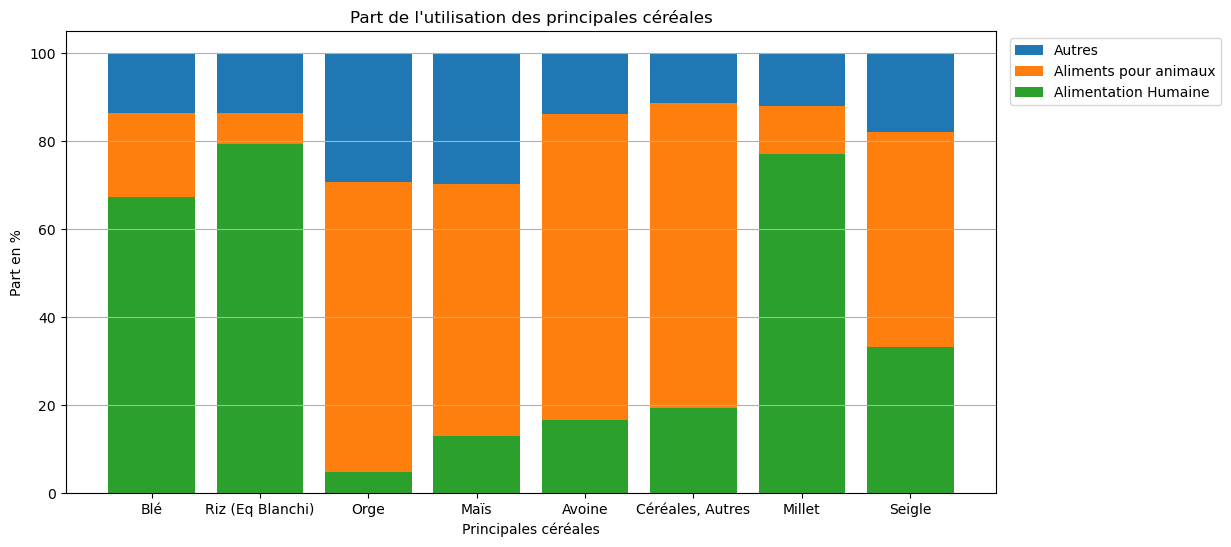

In [15]:
plt.figure(figsize=(12, 6))
plt.ylabel('Part en %')
plt.xlabel('Principales céréales')
plt.bar(df_normalized.index, df_normalized['Nourriture']+df_normalized['Aliments pour animaux']+df_normalized['Autres'], label= 'Autres')
plt.bar(df_normalized.index, df_normalized['Nourriture']+df_normalized['Aliments pour animaux'], label= 'Aliments pour animaux')
plt.bar(df_normalized.index, df_normalized['Nourriture'], label= 'Alimentation Humaine')
plt.grid(axis = "y")
# Titre du graphique
plt.title("Part de l'utilisation des principales céréales")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
# Afficher le graphique
plt.show()

6) Liste des 10 pays où la proportion de personnes en état de sous-nutrition est la plus forte en 2017

In [16]:
df_population_2017 = df_population_2017.rename(columns={'Valeur': 'Population'})
df_top_sous_nutrition = pd.merge(sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018'], df_population_2017, how = "inner", on="Zone")
df_top_sous_nutrition['Valeur'] = df_top_sous_nutrition['Valeur'].replace('<0.1', 0)
df_top_sous_nutrition['Proportion sous nutrition'] = (df_top_sous_nutrition['Valeur'].astype(float)*1000)/df_top_sous_nutrition['Population']*100
df_top_sous_nutrition = df_top_sous_nutrition.sort_values(by='Proportion sous nutrition', ascending=False).head(10)
df_top_sous_nutrition = df_top_sous_nutrition.drop(columns=['Année_x', 'Valeur', 'Année_y'],axis=1).reset_index(drop=True)

df_top_sous_nutrition.head(10)

,Zone,Population,Proportion sous nutrition
0,Haïti,10982.366,48.259182
1,République populaire démocratique de Corée,25429.825,47.188685
2,Madagascar,25570.512,41.062924
3,Libéria,4702.226,38.279742
4,Lesotho,2091.534,38.249438
5,Tchad,15016.753,37.957606
6,Rwanda,11980.961,35.055619
7,Mozambique,28649.018,32.810898
8,Timor-Leste,1243.258,32.173531
9,Afghanistan,36296.113,28.928718


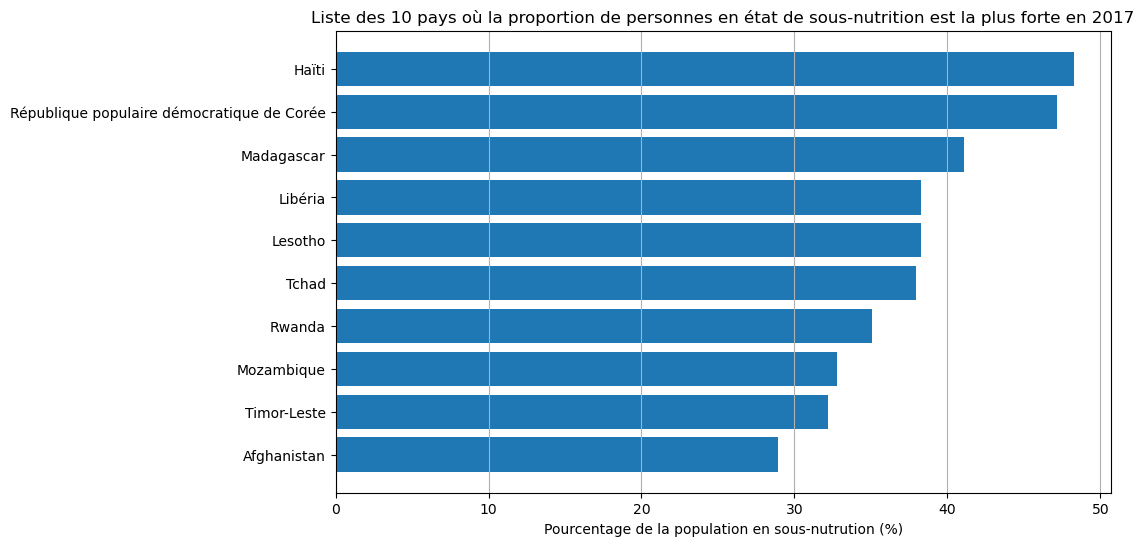

In [17]:
plt.figure(figsize=(10, 6))
plt.xlabel('Pourcentage de la population en sous-nutrution (%)')
plt.barh(df_top_sous_nutrition['Zone'], df_top_sous_nutrition['Proportion sous nutrition'])
plt.gca().invert_yaxis()
plt.grid(axis = "x")
# Titre du graphique
plt.title("Liste des 10 pays où la proportion de personnes en état de sous-nutrition est la plus forte en 2017")
# Afficher le graphique
plt.show()

7) Liste des 10 pays qui ont le plus bénéficié de l’aide alimentaire entre 2013 et 2016

In [18]:
df_aide = aide_alimentaire.groupby('Pays bénéficiaire')['Valeur'].sum().sort_values(ascending=False).head(10)/1000
df_aide.head(10)

Pays bénéficiaire
République arabe syrienne           1858.943
Éthiopie                            1381.294
Yémen                               1206.484
Soudan du Sud                        695.248
Soudan                               669.784
Kenya                                552.836
Bangladesh                           348.188
Somalie                              292.678
République démocratique du Congo     288.502
Niger                                276.344
Name: Valeur, dtype: float64

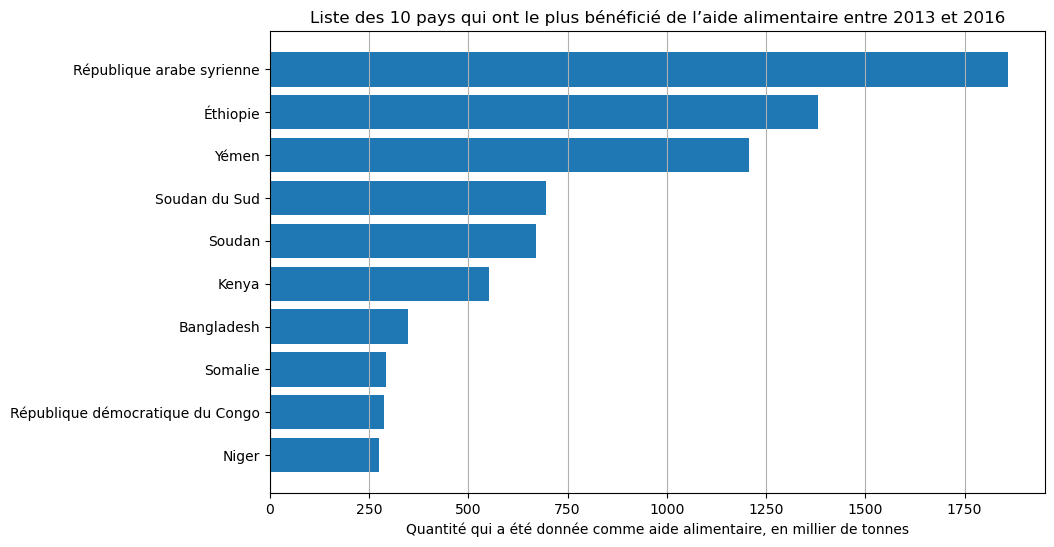

In [19]:
plt.figure(figsize=(10, 6))
plt.xlabel('Quantité qui a été donnée comme aide alimentaire, en millier de tonnes')
plt.barh(df_aide.index, df_aide)
plt.gca().invert_yaxis()
plt.grid(axis = "x")
# Titre du graphique
plt.title("Liste des 10 pays qui ont le plus bénéficié de l’aide alimentaire entre 2013 et 2016")
# Afficher le graphique
plt.show()

8) Évolution de l’aide alimentaire pour les 5 pays qui en ont le plus bénéficié entre 2013 et 2016

In [20]:
df_aide_evol = aide_alimentaire.groupby(['Pays bénéficiaire', 'Année'])['Valeur'].sum()/1000
df_aide_evol = df_aide_evol.loc[df_aide.index.tolist()].unstack()
print(df_aide_evol)
df_aide_evol.head()

Année                                2013     2014     2015     2016
Pays bénéficiaire                                                   
République arabe syrienne         563.566  651.870  524.949  118.558
Éthiopie                          591.404  586.624  203.266      NaN
Yémen                             264.764  103.840  372.306  465.574
Soudan du Sud                     196.330  450.610   48.308      NaN
Soudan                            330.230  321.904   17.650      NaN
Kenya                             220.966  217.418  114.452      NaN
Bangladesh                        131.018  194.628   22.542      NaN
Somalie                           139.800   81.180   71.698      NaN
République démocratique du Congo  150.320   70.134   68.048      NaN
Niger                              62.720   66.226   54.656   92.742


Année,2013,2014,2015,2016
Pays bénéficiaire,,,,
République arabe syrienne,563.566,651.870,524.949,118.558
Éthiopie,591.404,586.624,203.266,NaN
Yémen,264.764,103.840,372.306,465.574
Soudan du Sud,196.330,450.610,48.308,NaN
Soudan,330.230,321.904,17.650,NaN


<Figure size 1400x600 with 0 Axes>

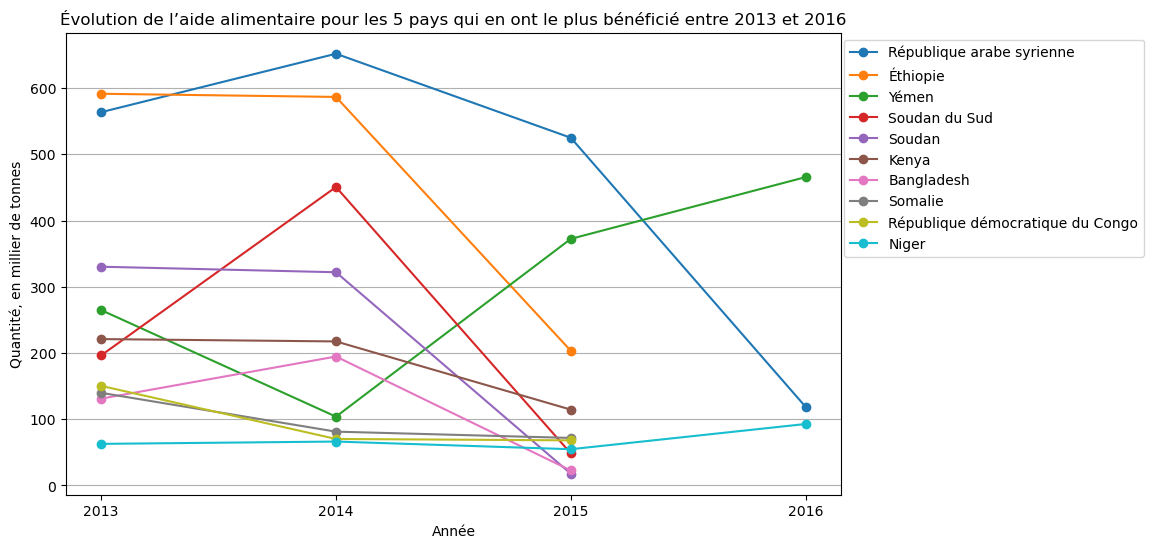

In [21]:
plt.figure(figsize=(14, 6))
df_aide_evol.T.plot(marker='o', figsize=(10, 6))
plt.ylabel('Quantité, en millier de tonnes')
plt.xticks(list(df_aide_evol.columns.unique()))
plt.grid(axis = "y")
plt.title("Évolution de l’aide alimentaire pour les 5 pays qui en ont le plus bénéficié entre 2013 et 2016")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

9) Liste des 10 pays qui ont la plus forte disponibilité alimentaire par habitant

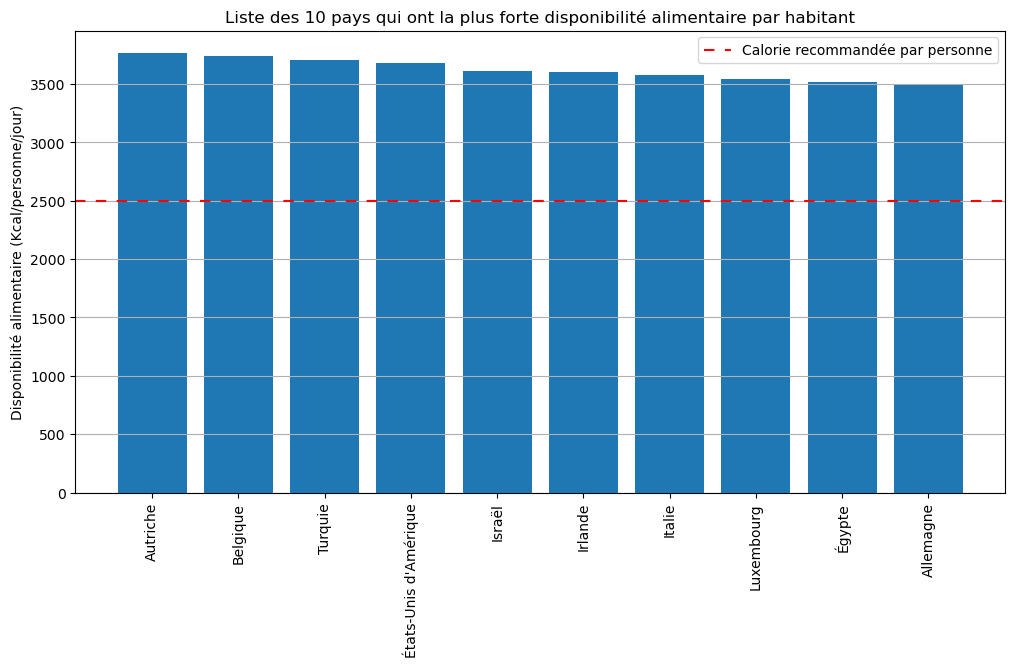

In [22]:
df_forte_dispo = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(df_forte_dispo.index, df_forte_dispo)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.grid(axis = "y")
plt.axhline(y=2500, color='red', linestyle=(0, (5, 5)), label='Calorie recommandée par personne')
plt.xticks(rotation=90) 
plt.title("Liste des 10 pays qui ont la plus forte disponibilité alimentaire par habitant")
plt.legend()
plt.show()

9) Liste des 10 pays qui ont la plus faible disponibilité alimentaire par habitant

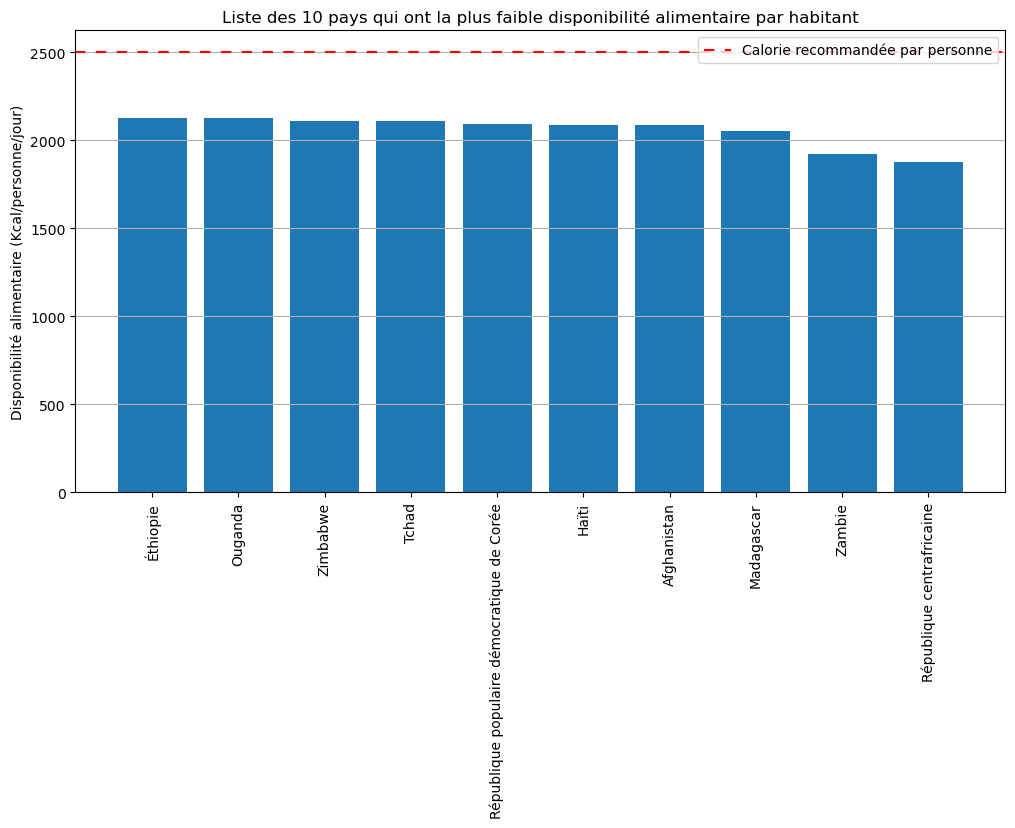

In [23]:
df_forte_dispo = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False).tail(10)
plt.figure(figsize=(12, 6))
plt.bar(df_forte_dispo.index, df_forte_dispo)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.grid(axis = "y")
plt.xticks(rotation=90)
plt.axhline(y=2500, color='red', linestyle=(0, (5, 5)), label='Calorie recommandée par personne')
plt.title("Liste des 10 pays qui ont la plus faible disponibilité alimentaire par habitant")
plt.legend()
plt.show()

10) Étude sur le manioc en Thaïlande

In [24]:
dispo_thai = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande'].groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
part_sous_nutr_thai = float((sous_nutrition.loc[(sous_nutrition['Zone'] == 'Thaïlande') & (sous_nutrition['Année'] == '2016-2018')]['Valeur']))*1000 / float(df_population_2017.loc[df_population_2017['Zone'] == 'Thaïlande']['Population'])*100
manioc_thai = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc')][['Exportations - Quantité', 'Production']]
print("La quantité de manioc produit en millier de tonnes est de :",int(manioc_thai['Production']),'et il en est exporté :',int(manioc_thai['Exportations - Quantité']))
print(round(int(manioc_thai['Exportations - Quantité'])/int(manioc_thai['Production'])*100, 2),"% est exporté")
print("La part de la population en sous-nutrition est de :",round(part_sous_nutr_thai, 2),"%")
print("La disponibilité alimentaire en Thaïlande est de :",int(dispo_thai.iloc[0]))

La quantité de manioc produit en millier de tonnes est de : 30228 et il en est exporté : 25214
83.41 % est exporté
La part de la population en sous-nutrition est de : 8.96 %
La disponibilité alimentaire en Thaïlande est de : 2785
